<h1><i>Package ACP</i></h1>
<h2>Analyse en Composantes Principales</h2>
<p>
Présentation du package <i>ACP</i> et de ses fonctionnalités sur un jeu de données afin de le décrire.<br />
</p>



In [3]:
import pandas as pd
from ACP.acp import PCA
%matplotlib inline

In [4]:
df = pd.read_table("data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [5]:
df

CYL  PUISS  LONG  LARG  POIDS  V-MAX FINITION   PRIX
Modele                                                                
Alfasud-TI       1350     79   393   161    870    165        B  30570
Audi-100         1588     85   468   177   1110    160       TB  39990
Simca-1300       1294     68   424   168   1050    152        M  29600
Citroen-GS-Club  1222     59   412   161    930    151        M  28250
Fiat-132         1585     98   439   164   1105    165        B  34900
Lancia-Beta      1297     82   429   169   1080    160       TB  35480
Peugeot-504      1796     79   449   169   1160    154        B  32300
Renault-16-TL    1565     55   424   163   1010    140        B  32000
Renault-30       2664    128   452   173   1320    180       TB  47700
Toyota-Corolla   1166     55   399   157    815    140        M  26540
Alfetta-1.66     1570    109   428   162   1060    175       TB  42395
Princess-1800    1798     82   445   172   1160    158        B  33990
Datsun-200L      1998    115   469   169   1370    160       TB  43980
Taunus-2000      1993     98   438   170   1080    167        B  35010
Rancho           1442     80   431   166   1129    144       TB  39450
Mazda-9295       1769     83   440   165   1095    165        M  27900
Opel-Rekord      1979    100   459   173   1120    173        B  32700
Lada-1300        1294     68   404   161    955    140        M  22100

L'analyse va porter sur les 6 premières variables.

<p>On crée une instance de la classe PCA, le constructeur de la classe PCA possède un paramètre <i>sdt_unit</i> qui indique si l'ACP est réalisée :
<ul>
    <li>à partir de données centrées et réduites -> PCA(std_unit=True)</li>
    <li>à partir de données centrées mais non réduites -> PCA(std_unit=False)</li>
</ul>
</p>
<p>Par défaut, la valeur du paramètre <i>std_unit</i> est fixée à True, car c'est le cas le plus courant.</p>

In [6]:
my_pca = PCA(std_unit=True)

On estime le modèle en appliquant la méthode <i>fit</i> de la classe PCA sur le jeu de données tout en indiquant en paramètre de la méthode les variables qualitatives ou quantitatives supplémentaires ainsi les observations supplémentaires.

In [7]:
qsup = [8]
isup = [17,18]
qlsup = [7]
#,quanti_sup=qsup, ind_sup=isup
my_pca.fit(df,quanti_sup=qsup, ind_sup=isup,quali_sup=qlsup)

d:\Document\Projet\Git\Projet\ACP\acp.py:200: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_qual.append(np.mean(dt[df[df.columns[j]]==i],axis=0))
d:\Document\Projet\Git\Projet\ACP\acp.py:200: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_qual.append(np.mean(dt[df[df.columns[j]]==i],axis=0))
d:\Document\Projet\Git\Projet\ACP\acp.py:200: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_qual.append(np.mean(dt[df[df.columns[j]]==i],axis=0))


PCA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX'], dtype='object'),
    row_labels=Index(['Alfasud-TI', 'Audi-100', 'Simca-1300', 'Citroen-GS-Club', 'Fiat-132',
       'Lancia-Beta', 'Peugeot-504', 'Renault-16-TL', 'Renault-30',
       'Toyota-Corolla', 'Alfetta-1.66', 'Princess-1800', 'Datsun-200L',
       'Taunus-2000', 'Rancho', 'Mazda-9295'],
      dtype='object'))

La méthode <i>summary</i> résume les valeurs propres ainsi que les coordonnées des points lignes et colonnes selon les composantes tout en ajoutant la contribution et le cosinus carré.

In [8]:
my_pca.summary()

L'analyse des valeurs propres peut se faire selon :
<ul>
    <li>les valeurs propres en valeur absolue</li>
    <li>les valeurs propres en pourcentage de la variance totale</li>
    <li>les valeurs propres en pourcentage cumulé de la variance totale</li>

</ul>

In [9]:
my_pca.show_eig()

In [10]:
my_pca.show_eigen_vectors()

Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

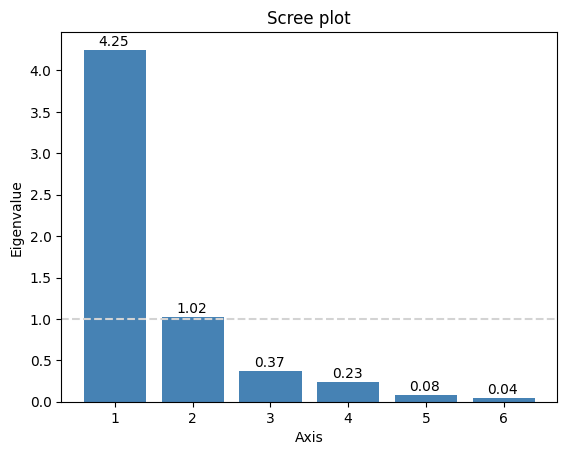

In [11]:
my_pca.plot_eigenvalues()

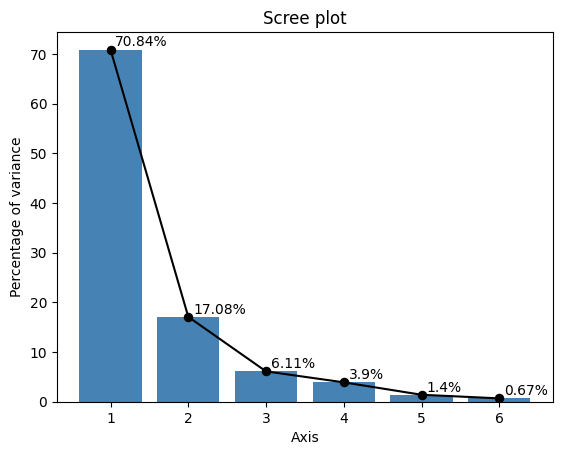

In [12]:
my_pca.plot_eigenvalues(type="percentage")

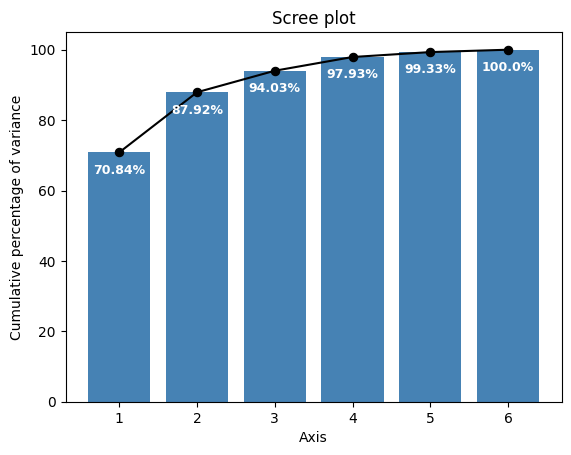

In [13]:
my_pca.plot_eigenvalues(type="cumulative")

<p>
Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.<br />
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre <i>n_components</i> avec par exemple :<br />
my_pca = PCA(n_components=3)
</p>


On peut représenter dans un tableau de manière lisible les coordonnées, les contributions et les cos2 de chacun des points lignes ou colonnes mais également récupérés les valeurs de ces dernières sous la forme d'un DataFrame afin de les manipuler ou de les exporter.

In [14]:
my_pca.show_row()

In [15]:
my_pca.row_coord_
#my_pca.row_contrib_
#my_pca.row_cos2_

array([[-2.19826038, -1.82855049, -0.52549603, -0.27717364,  0.27011868,
         0.01833354],
       [ 1.56536128,  1.56383941, -1.38040356,  0.12459063, -0.39024514,
         0.29722155],
       [-1.15192565,  0.68629819, -0.48817129,  0.07859068,  0.38749613,
        -0.20554675],
       [-2.61802334, -0.0980944 , -0.01785225,  0.01486462, -0.14236675,
        -0.23341883],
       [ 0.40462269, -0.71183242,  0.15108499,  0.63746343, -0.23130831,
         0.02594675],
       [-0.33249712,  0.18245243, -0.78610177,  0.44080958,  0.40892259,
        -0.14694001],
       [ 0.67097691,  0.95546134,  0.26133391, -0.19299784, -0.18756082,
        -0.14288173],
       [-1.98411391,  1.04711574,  0.79410042, -0.57161989, -0.1580024 ,
        -0.06640704],
       [ 4.40107576, -1.14511239,  0.38337972, -0.88363925,  0.25912398,
         0.00501741],
       [-4.04508858, -0.16046736,  0.5477123 , -0.20925733, -0.14755611,
         0.37571906],
       [ 0.40555116, -1.97212884, -0.09859174,  0.

In [16]:
my_pca.show_col()

In [17]:
my_pca.col_coord_
#my_pca.col_contrib_
#my_pca.col_cos2_

array([[ 0.88216336, -0.12450429,  0.2555315 , -0.37216319, -0.04825953,
         0.01247864],
       [ 0.88108205, -0.40550615,  0.07057174,  0.17385189,  0.07992327,
         0.13291576],
       [ 0.86540989,  0.42475327,  0.00240089,  0.16144648, -0.21012155,
         0.02070227],
       [ 0.78305437,  0.44480443, -0.39775914, -0.13824755,  0.10410078,
         0.02851644],
       [ 0.91927704,  0.22094921,  0.23956228,  0.13998482,  0.12734446,
        -0.11361659],
       [ 0.69922564, -0.64626913, -0.28379228,  0.02142952, -0.06376527,
        -0.09141347]])

<p>
3 types de graphiques peuvent être réalisés :
<ul>
    <li>Le cercle des corrélations</li>
    <li>Le mapping des point lignes</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes</li>
</ul>
</p>


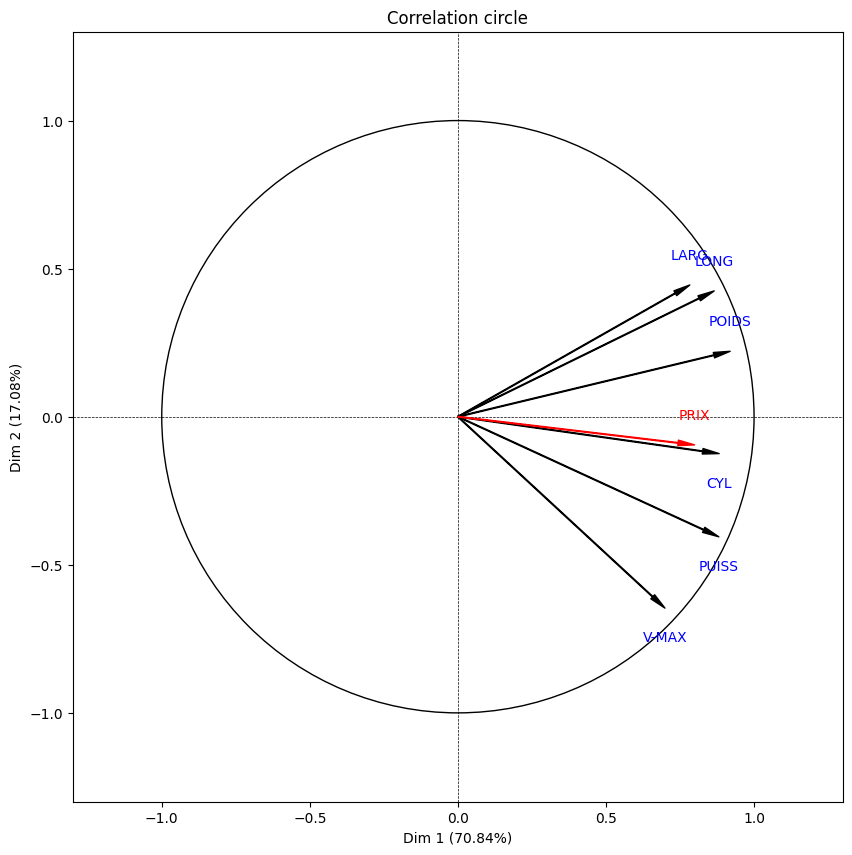

In [18]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(10,10))

Sur le cercle des corrélations, les variables quantitatives supplémentaires sont indiquées en rouge. 

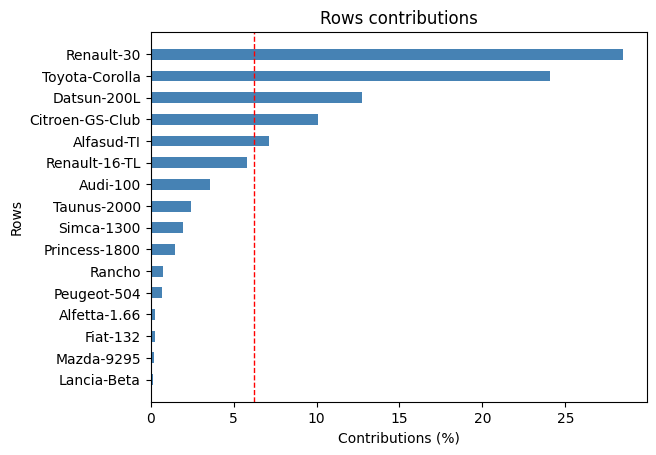

In [19]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_pca.plot_row_contrib(num_axis=1)

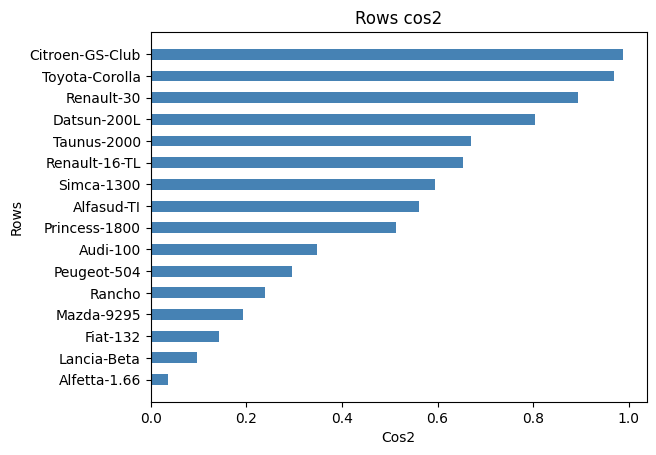

In [20]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_pca.plot_row_cos2(num_axis=1)

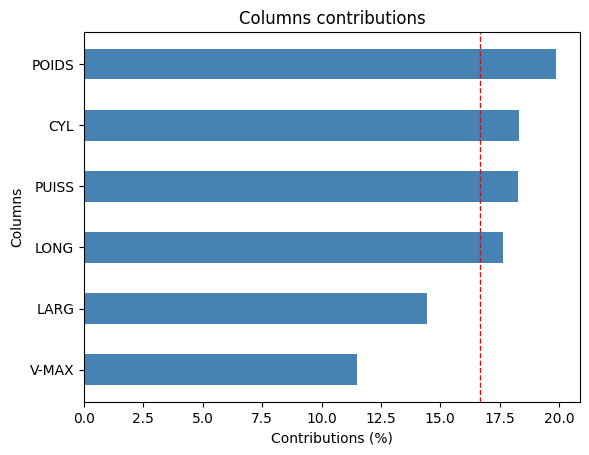

In [21]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_pca.plot_col_contrib(num_axis=1)

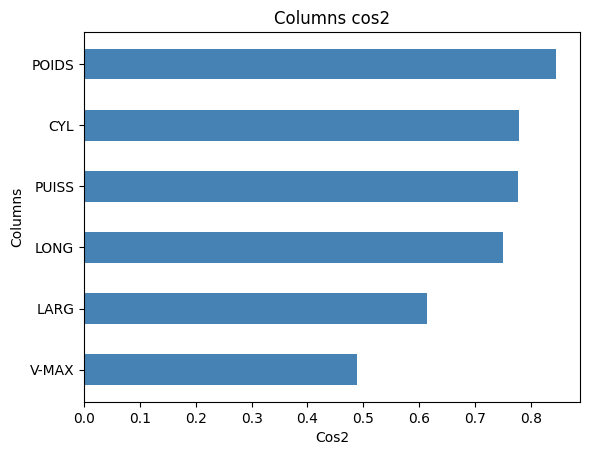

In [22]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_pca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes <i>plot_row_contrib</i>, <i>plot_row_cos2</i>, <i>plot_col_contrib</i>, <i>plot_col_cos2</i>, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

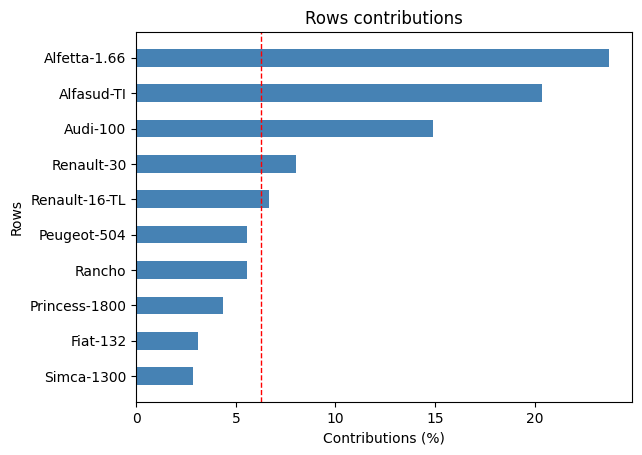

In [23]:
my_pca.plot_row_contrib(num_axis=2, nb_values=10)

Pour tous les graphiques présentés plus haut, il est possible de définir un taille particulière via le paramètre <i>figsize</i>.

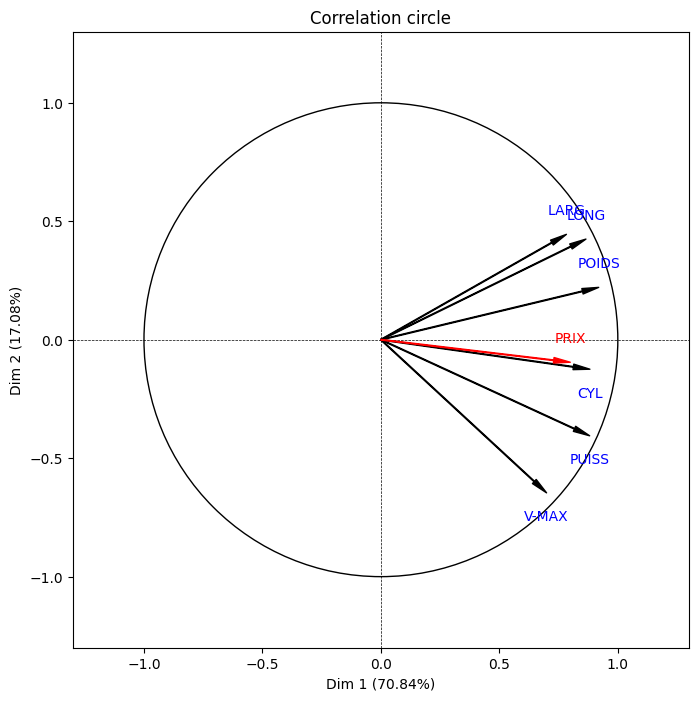

In [24]:
my_pca.correlation_circle(1, 2, figsize=(10, 8))

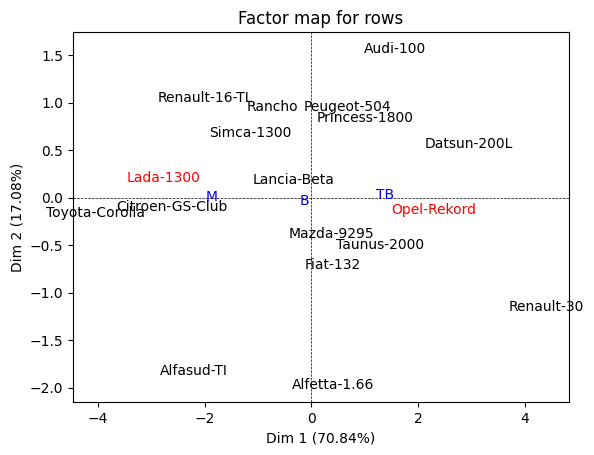

In [25]:
my_pca.mapping_row(1,2)

Pour le mapping des points lignes, les variables qualitatives supplémentaires sont représentées en bleu et les observations supplémentaires sont représentées en rouge. Les paramètres de cette méthode permettent d'indiquer les axes représentés, ici axe 1 et 2, mais également de modifier la représentation des individus en fonction de leur contribution, leur cosinus carré ou encore d'une variable supplémentaire. La valeur de ces derniers est renseigné en fonction du premier axe indiqués dans les paramètres de la méthode.

<Figure size 640x480 with 0 Axes>

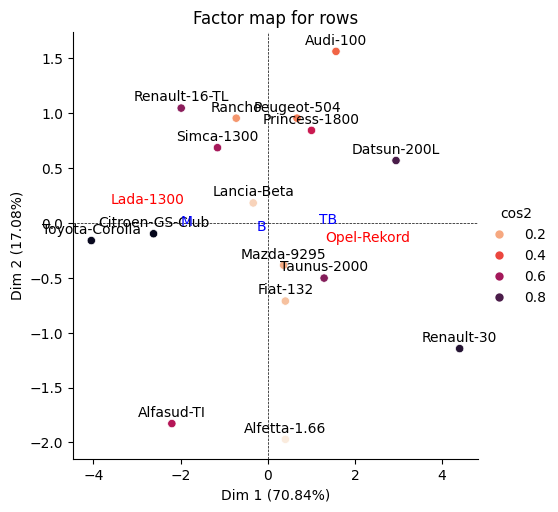

In [26]:
my_pca.mapping_row(1,2,type = "cos2")

<Figure size 640x480 with 0 Axes>

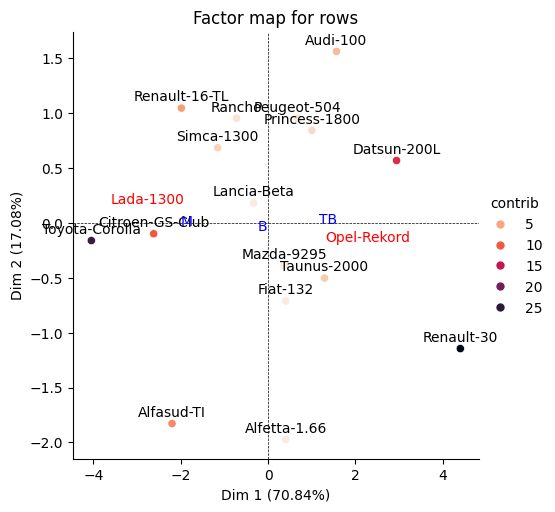

In [27]:
my_pca.mapping_row(1,2,type = "contrib")

<Figure size 640x480 with 0 Axes>

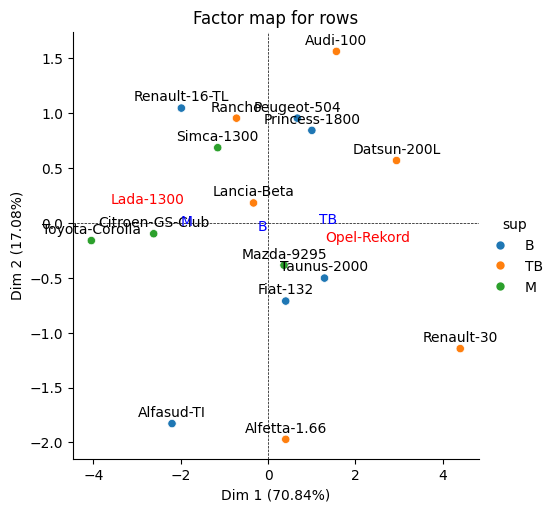

In [28]:
my_pca.mapping_row(1,2,type = "sup")